**Assign 2**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

data = pd.read_csv("mnist_train.csv")

X = data.drop("label", axis=1)
y = data["label"]


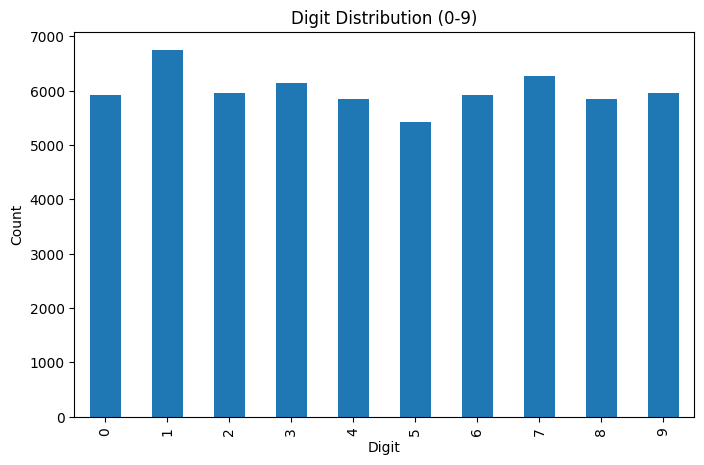

In [45]:
plt.figure(figsize=(8,5))
y.value_counts().sort_index().plot(kind='bar')
plt.title("Digit Distribution (0-9)")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()


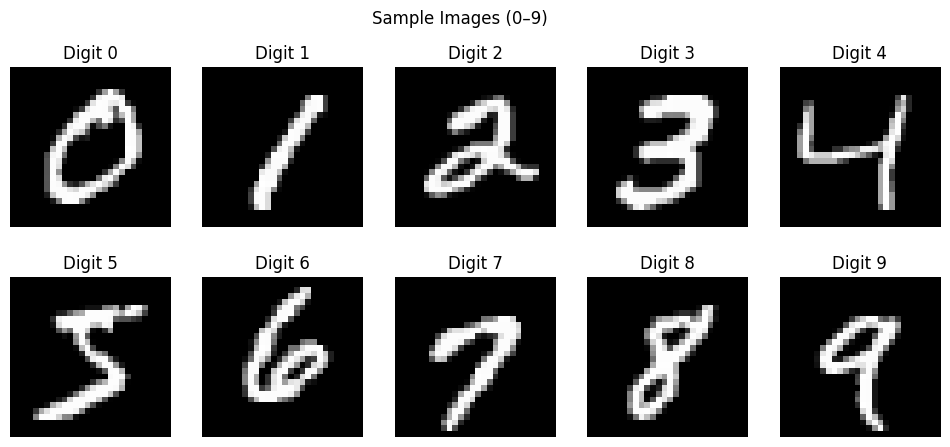

In [46]:
plt.figure(figsize=(12,5))

for digit in range(10):
    index = y[y == digit].index[0]
    image = X.loc[index].values.reshape(28,28)

    plt.subplot(2,5,digit+1)
    plt.imshow(image, cmap='gray')
    plt.title(f"Digit {digit}")
    plt.axis('off')

plt.suptitle("Sample Images (0–9)")
plt.show()


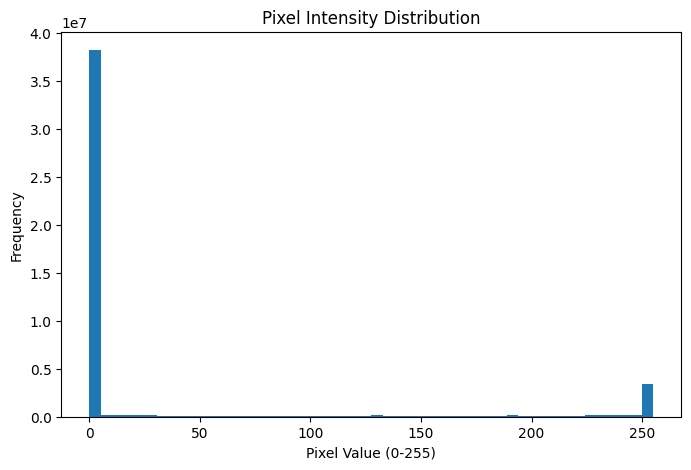

In [47]:
plt.figure(figsize=(8,5))
plt.hist(X.values.flatten(), bins=50)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value (0-255)")
plt.ylabel("Frequency")
plt.show()


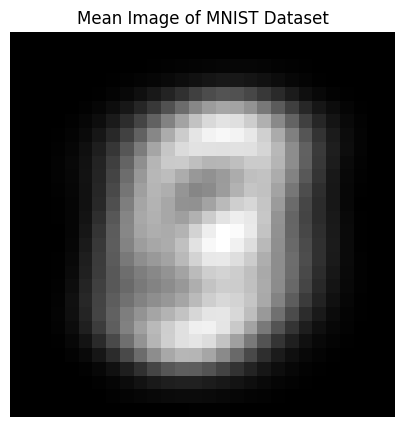

In [48]:
mean_image = X.mean().values.reshape(28,28)

plt.figure(figsize=(5,5))
plt.imshow(mean_image, cmap='gray')
plt.title("Mean Image of MNIST Dataset")
plt.axis('off')
plt.show()


In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [50]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Reduced Shape after PCA:", X_pca.shape)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Reduced Shape after PCA: (60000, 2)
Explained Variance Ratio: [0.05646717 0.04078272]


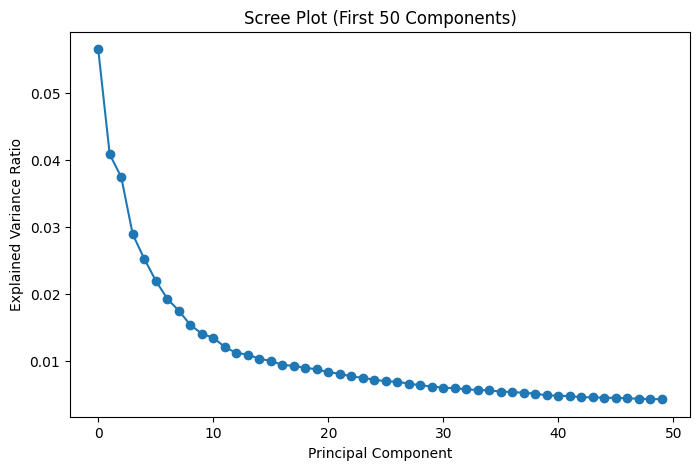

In [51]:
pca_full = PCA()
pca_full.fit(X_scaled)

plt.figure(figsize=(8,5))
plt.plot(pca_full.explained_variance_ratio_[:50], marker='o')
plt.title("Scree Plot (First 50 Components)")
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.show()


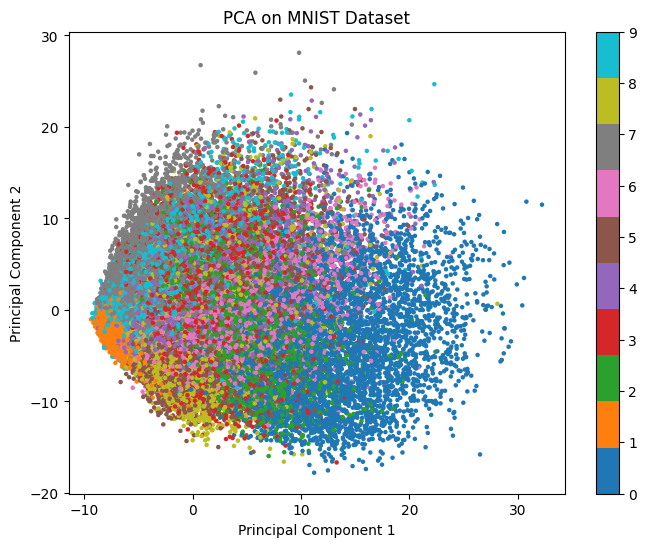

In [52]:

# ==============================
# 6️⃣ Visualization - PCA
# ==============================

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', s=5)
plt.colorbar(scatter)
plt.title("PCA on MNIST Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()



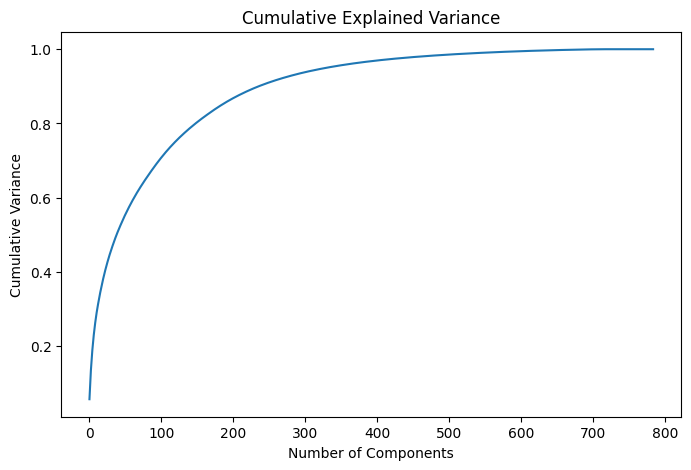

In [53]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.title("Cumulative Explained Variance")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance")
plt.show()


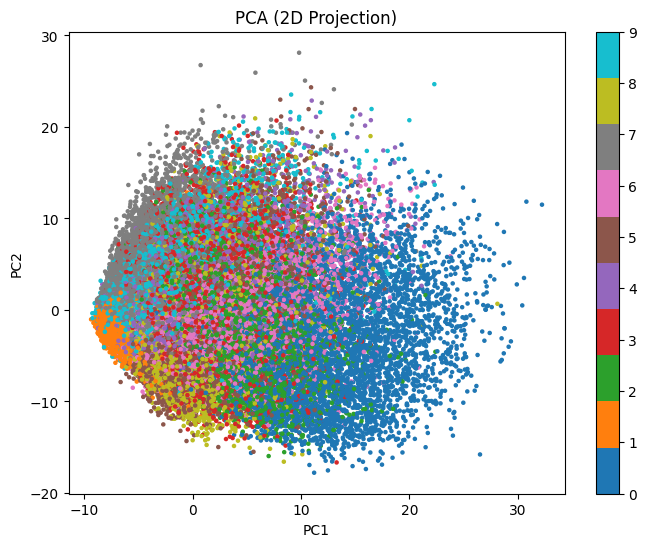

In [54]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', s=5)
plt.colorbar(scatter)
plt.title("PCA (2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


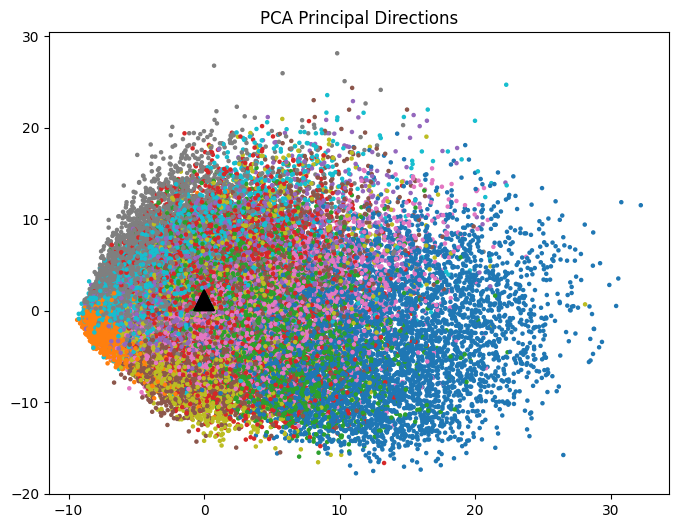

In [55]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='tab10', s=5)

mean = np.mean(X_pca, axis=0)
vectors = pca.components_

for i in range(2):
    plt.arrow(mean[0], mean[1],
              vectors[i,0]*20,
              vectors[i,1]*20,
              color='black',
              width=0.5)

plt.title("PCA Principal Directions")
plt.show()


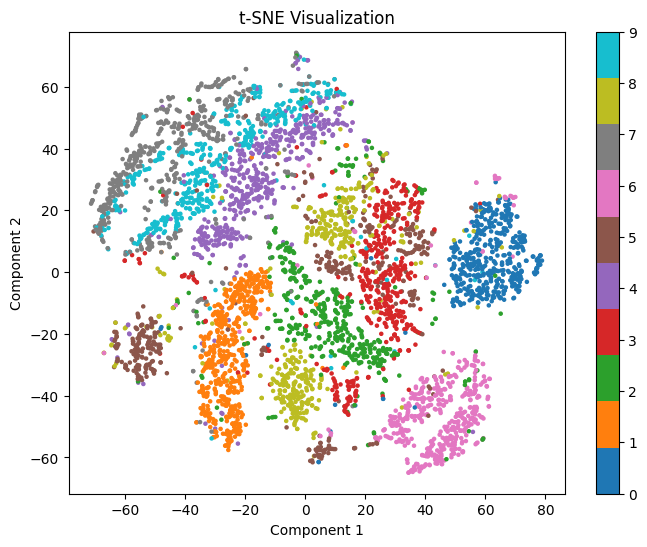

In [56]:
X_subset = X_scaled[:5000]
y_subset = y[:5000]

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_subset)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y_subset, cmap='tab10', s=5)
plt.colorbar(scatter)
plt.title("t-SNE Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
